<a href="https://colab.research.google.com/github/MarceloCaram/DataSciencePython/blob/master/Analisando_os_Dados_do_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *New York City*
*by Marcelo Caram*

---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

O Airbnb oferece aos seus clientes alugueis de maneira prática, através de uma  plataforma inovadora, conectando pessoas que queiram viajar (e se hospedar) em suas residências.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

**UM BREVE RESUMO SOBRE A CIDADE DE NEW YORK**

O estado de Nova York é um dos mais povoados de todo o território norte-americano. Localizado na região atlântica e central dos EUA, 
o estado abriga a “City of New York”. Que é composta por cinco boroughs: Bronx, Brooklyn, Manhattan, Queens e Staten Island.
New York City é um verdadeiro polo cultural, comercial, político e comunicacional dos Estados Unidos. 

* **boroughs significa "pequena fortaleza povoada"**

Com seus quase 20 milhões de habitantes, ele é o 3º estado norte-americano em aspectos populacionais, 
perdendo para a Califórnia e, em seguida, para o Texas.

**Localização geográfica**
O estado de Nova York faz as seguintes fronteiras: ao Norte com o Canadá, a Oeste com o Lago Erie, ao Sudeste com o Oceano Atlântico, 
ao Sul com o estado de Nova Jersey e ao Leste com Connecticut.

**Clima de NY**
O clima do estado, por sua vez, é bem distinto – apesar de ser predominantemente temperado. 
Na cidade mais visitada do estado, ou seja, a cidade de Nova York, a temperatura média ao longo do ano é de 23 graus. 
Porém, durante o inverno, ela pode chegar a -2 graus e com incidência de neve.

**Economia do estado de Nova York**
A economia do estado também merece destaque especial, já que Nova York é considerado o maior centro econômico de todo o território 
norte-americano. Seu PIB, de 822 bilhões de dólares, geralmente é justificado uma vez que a megalópole se estende de Washington 
(DC) até Boston.

**Atrações turísticas**
Um dos pontos forte de New York City são as atrações e pontos turísticos. É uma cidade repleta de variedade tanto em lazer, cultura e gastronomia. A variedade de museus chega a impressionar os turistas, assim como a variedade de shows,bares e restaurantes. Um dos pontos turísticos mais visitados e não menos importante esta o Central Park com 3,15 km² de extensão, com visita anual de aproximadmente 42 milhões de visitantes. Outros pontos turisticos muito visitados em New York são Time Square, Brodway, Estátua da Liberdade, Empire State Building, Rockfeller Center, entre outros.

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv");

## Análise dos Dados

Esta etapa tem como objetivo explicar melhor quais são os dados que iremos tratar nessa analise envolve a cidade de New York.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar como ficaram as 5 primeiras linhas do nosso **dataset**.

In [103]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos continuar com nossa análise e identificar a quantidade de atributos que o nosso conjunto de dados possui, além do tipo de cada coluna no nosso ***dataset*** e ver os tipos de cada coluna.

Este ***dataset*** que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 50.246 entradas e 106 variáveis (`listings.csv.gz`).

In [104]:
# identificar o volume de dados do DataFrame
print("Entradas: \t{}".format(df.shape[0]));
print("Atributos: \t{}".format(df.shape[1]));

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	50246
Atributos: 	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Antes de qualquer análise mais afundo é importante sabermos dentro do nosso **dataset** as quantidades de colunas que não obtem nenhuma informação ou seja colunas NULAS.

Precisamos saber logo no começo se a quantidade desses valores são significativos comparados ao total de entradas do nosso **dataset**.

* As variáveis `reviews_per_month` e `last_review` possui o mesmo % de inconsistências ou seja quase 22% dos valores nulos.
* A variável `name` possue aproximadamente 0,35% dos valores nulos.
* A variável `host_name` possue aproximadamente 0,2% dos valores nulos.


In [105]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei colocar a tabela abaixo e  plotar o gráfico desta tabela do tipo histograma.

In [106]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.024600e+04,5.024600e+04,50246.000000,50246.000000,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,2.283689e+07,8.553550e+07,40.729364,-73.951111,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,1.336840e+07,9.850817e+07,0.054592,0.047535,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,2.060000e+03,2.259000e+03,40.499790,-74.240840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.096980e+07,9.452198e+06,40.689940,-73.983490,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,2.229321e+07,3.861233e+07,40.723810,-73.955350,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,3.526713e+07,1.389319e+08,40.762937,-73.934220,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,4.336667e+07,3.454685e+08,40.916990,-73.712990,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


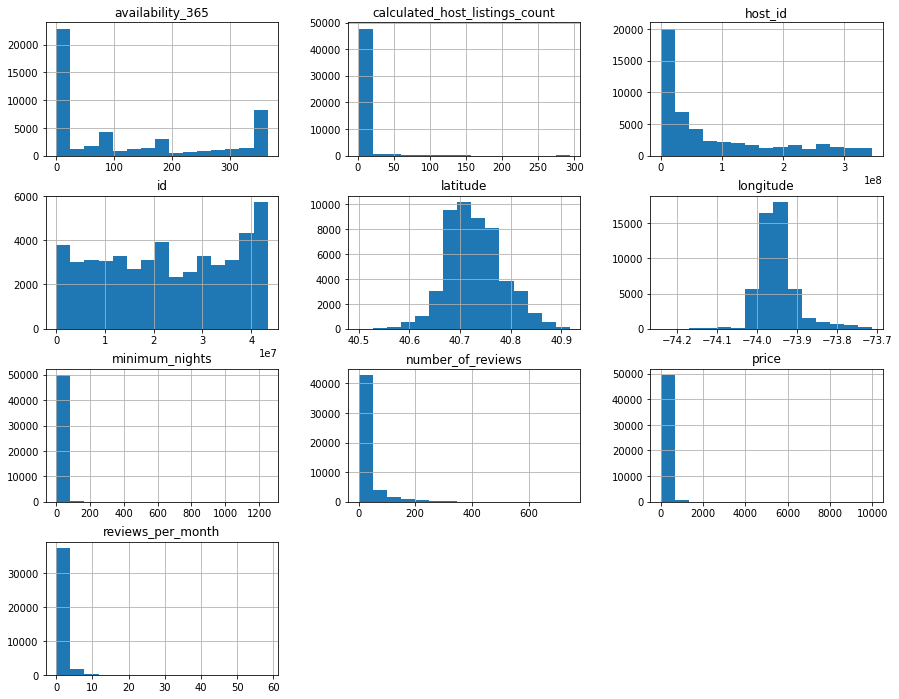

In [107]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,12));

### **Q4. Qual a média dos preços de aluguel?**

Abaixo o comando para verificar qual é a média de preços das locações disponíveis na cidade de NewYork.

In [108]:
# ver a média da coluna `price``
df['price'].mean()

163.1307765792302

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um **heatmap** a partir dessa matriz, usando a biblioteca chamado o **`seaborn`**

In [109]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.017178,-0.036491,-0.009299,0.010577,0.064419
minimum_nights,0.017178,1.000000,-0.081439,-0.104093,0.166418,0.147477
number_of_reviews,-0.036491,-0.081439,1.000000,0.699320,-0.080117,0.186228
reviews_per_month,-0.009299,-0.104093,0.699320,1.000000,-0.064513,0.209332
calculated_host_listings_count,0.010577,0.166418,-0.080117,-0.064513,1.000000,0.167157
availability_365,0.064419,0.147477,0.186228,0.209332,0.167157,1.000000


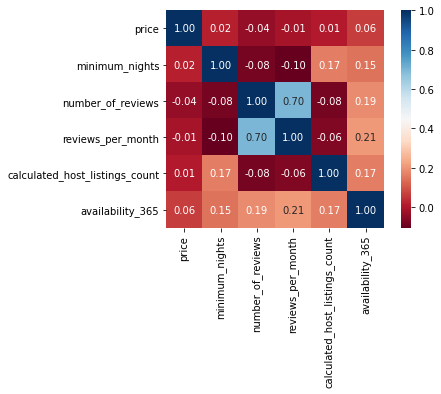

In [110]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [111]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    26073
Private room       22599
Shared room         1140
Hotel room           434
Name: room_type, dtype: int64

O gráfico abaixo ilustra as informações de quantidade de tipo de  imóvel que esta disponível para locação.

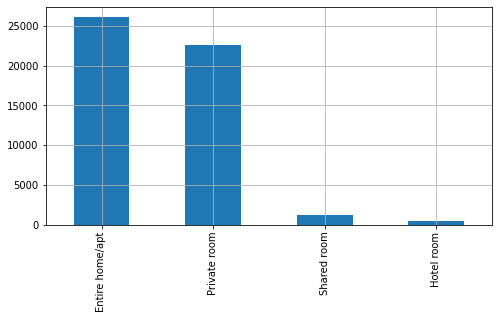

In [112]:
dfh = df.room_type.value_counts()
dfh.plot(kind="bar", grid=True, figsize=(8,4));


In [113]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.518907
Private room       0.449767
Shared room        0.022688
Hotel room         0.008638
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de New York ?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [114]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Woodrow             2350.000000
Country Club        1000.000000
Manhattan Beach      861.538462
Fort Wadsworth       700.000000
Prince's Bay         506.666667
Midtown              503.619188
Theater District     487.131805
Tribeca              418.358974
Sea Gate             369.076923
Riverdale            337.000000
Name: price, dtype: float64

Abaixo a importância  de se analisar as informações antes de divulgá-las.

Apesar do bairro Woodrow tem a média maior, analisando os dados abaixo vimos que só existem dois imóveis nesse bairro, sendo um deles com valor de 4 mil e um de 700, uma discrepância que faz com a média seja elevada. Porém em Manhatthan Beach existem imóveis muito mais caros mas quando fazemos a média o valor cair pela quantidade de imóveis existentes nesse bairro.

In [115]:
# ver quantidade de imóveis no bairro Woodrow
print(df[df.neighbourhood == "Woodrow"].shape)

# ver as 2 entradas de imóveis disponiveis para o bairro Woodrow
df[df.neighbourhood == "Woodrow"]

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2650,1798271,Spacious center hall colonial,9430973,Donna,Staten Island,Woodrow,40.53884,-74.19826,Entire home/apt,700,7,0,NaN,NaN,1,0
49032,42949093,S.I. home,341475072,Kareem,Staten Island,Woodrow,40.53865,-74.19631,Entire home/apt,4000,1,0,NaN,NaN,1,220


**Podemos perceber os valores maiores em outros bairros depois de realizarmos a médida entre o agrupamento de bairros versus o preço.**

Como podem perceber analisando a tabela acima e a tabela abaixo **(média do prçeo vs agrupamento de bairro)** o bairro Woodrow fica no **boroughs** chamado Staten Island que esta representado no **dataset** como *neighbourhood_group*. Onde o **boroughs** Staten Island é o terceiro em questão de preços, atrás de Manhattan e Brooklyn.

In [116]:
# Analisar á média do preço vs agrupamento de bairro
df[['neighbourhood_group', 'price']].groupby(['neighbourhood_group']).mean()

,price
neighbourhood_group,
Bronx,90.866555
Brooklyn,125.147547
Manhattan,219.378652
Queens,99.725118
Staten Island,117.321622


Abaixo podemos  observar um gráfico que ilustra melhor a relação dos bairros agrupados **(boroughs)** vs preço.

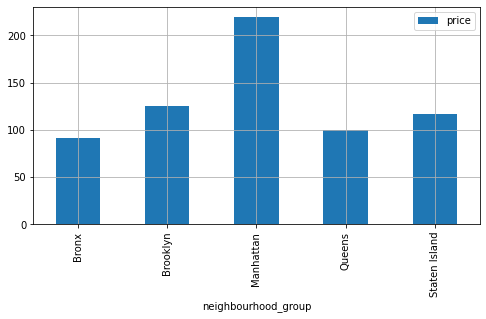

In [117]:
agrup = df[['neighbourhood_group', 'price']].groupby(['neighbourhood_group']).mean()
agrup.plot(kind="bar", grid=True, figsize=(8,4));

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.



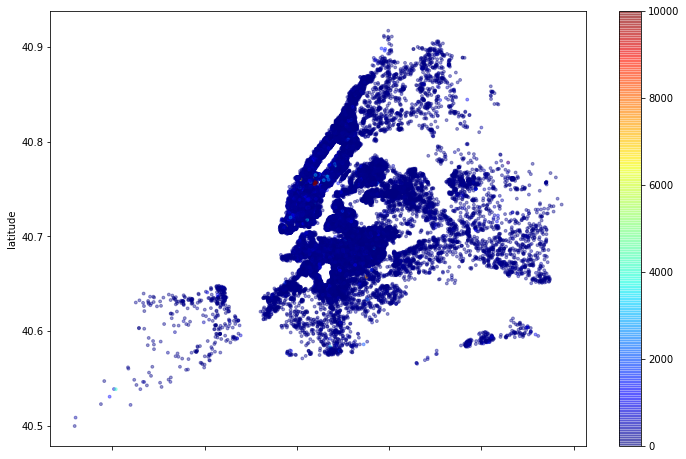

In [118]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [119]:
# ver a média da coluna `minimum_nights`
df['minimum_nights'].mean()

7.912968196473351

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb para cidade de New York.

Também notou se que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este ***dataset*** é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.